## Optimization of Equity Portfolio Allocation 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download Six Companies' data as csv files, Import and set index column

In [4]:
MSFT = pd.read_csv(r"UCD Python/FinalProject/MSFT.csv", index_col = 0)
AMZN = pd.read_csv(r"UCD Python/FinalProject/AMZN.csv", index_col = 0)
AAPL = pd.read_csv(r"UCD Python/FinalProject/AAPL.csv", index_col = 0)
TLSA = pd.read_csv(r"UCD Python/FinalProject/TLSA.csv", index_col = 0)
META = pd.read_csv(r"UCD Python/FinalProject/META.csv", index_col = 0)
BLK = pd.read_csv(r"UCD Python/FinalProject/BLK.csv", index_col = 0)

In [5]:
# To set index as datetime index to avoid overlapped dates on the x label

In [6]:
MSFT['Date'] = pd.to_datetime(MSFT.index)
MSFT.set_index(["Date"], inplace=True)
AMZN['Date'] = pd.to_datetime(AMZN.index)
AMZN.set_index(["Date"], inplace=True)
AAPL['Date'] = pd.to_datetime(AAPL.index)
AAPL.set_index(["Date"], inplace=True)
TLSA['Date'] = pd.to_datetime(TLSA.index)
TLSA.set_index(["Date"], inplace=True)
META['Date'] = pd.to_datetime(META.index)
META.set_index(["Date"], inplace=True)
BLK['Date'] = pd.to_datetime(BLK.index)
BLK.set_index(["Date"], inplace=True)

In [94]:
MSFT.groupby('Date')['Adj Close'].min()

Date
2022-07-11    261.977692
2022-07-12    251.241440
2022-07-13    250.300552
2022-07-14    251.647522
2022-07-15    254.262238
                 ...    
2023-06-30    340.540009
2023-07-03    337.989990
2023-07-05    338.149994
2023-07-06    341.269989
2023-07-07    337.220001
Name: Adj Close, Length: 250, dtype: float64

In [100]:
# Merge of two DataFrames MSFT and AMZN 
MSFT_AMZN = MSFT.merge(AMZN, on = 'Date')
MSFT_AMZN.head(5)

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,MA: 10_x,MA: 20_x,MA: 30_x,Daily Returns_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,MA: 10_y,MA: 20_y,MA: 30_y,Daily Returns_y
Date,,,,,,,,,,,,,,,,,,,,
2022-07-11,265.649994,266.529999,262.179993,264.510010,261.977692,19455200,NaN,NaN,NaN,NaN,114.080002,114.300003,110.870003,111.750000,111.750000,53487600,NaN,NaN,NaN,NaN
2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500,NaN,NaN,NaN,-0.040982,112.160004,113.230003,108.339996,109.220001,109.220001,54280300,NaN,NaN,NaN,-0.022640
2022-07-13,250.190002,253.550003,248.110001,252.720001,250.300552,29497400,NaN,NaN,NaN,-0.003745,107.029999,111.779999,106.010002,110.400002,110.400002,61353800,NaN,NaN,NaN,0.010804
2022-07-14,250.570007,255.139999,245.940002,254.080002,251.647522,25102800,NaN,NaN,NaN,0.005381,110.239998,111.180000,107.580002,110.629997,110.629997,51163100,NaN,NaN,NaN,0.002083
2022-07-15,255.720001,260.369995,254.770004,256.720001,254.262238,29774100,NaN,NaN,NaN,0.010390,112.500000,115.589996,111.589996,113.550003,113.550003,84317800,NaN,NaN,NaN,0.026394


In [7]:
MSFT.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,265.649994,266.529999,262.179993,264.510010,261.977692,19455200
2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500
2022-07-13,250.190002,253.550003,248.110001,252.720001,250.300552,29497400
2022-07-14,250.570007,255.139999,245.940002,254.080002,251.647522,25102800
2022-07-15,255.720001,260.369995,254.770004,256.720001,254.262238,29774100


In [8]:
MSFT.sort_values(by = ['Adj Close'], ascending=False).head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-15,337.480011,349.839996,337.200012,348.100006,348.100006,38899100
2023-06-16,351.320007,351.470001,341.950012,342.329987,342.329987,46533600
2023-07-06,337.299988,342.989990,335.500000,341.269989,341.269989,28161200
2023-06-30,337.750000,342.730011,337.200012,340.540009,340.540009,26823800
2023-06-22,334.119995,340.119995,333.339996,339.709991,339.709991,23556800


In [9]:
MSFT.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,265.649994,266.529999,262.179993,264.510010,261.977692,19455200
2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500
2022-07-13,250.190002,253.550003,248.110001,252.720001,250.300552,29497400
2022-07-14,250.570007,255.139999,245.940002,254.080002,251.647522,25102800
2022-07-15,255.720001,260.369995,254.770004,256.720001,254.262238,29774100


In [10]:
AMZN.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,114.080002,114.300003,110.870003,111.750000,111.750000,53487600
2022-07-12,112.160004,113.230003,108.339996,109.220001,109.220001,54280300
2022-07-13,107.029999,111.779999,106.010002,110.400002,110.400002,61353800
2022-07-14,110.239998,111.180000,107.580002,110.629997,110.629997,51163100
2022-07-15,112.500000,115.589996,111.589996,113.550003,113.550003,84317800


In [11]:
AAPL.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,145.669998,146.639999,143.779999,144.869995,144.010071,63141600
2022-07-12,145.759995,148.449997,145.050003,145.860001,144.994186,77588800
2022-07-13,142.990005,146.449997,142.119995,145.490005,144.626404,71185600
2022-07-14,144.080002,148.949997,143.250000,148.470001,147.588699,78140700
2022-07-15,149.779999,150.860001,148.199997,150.169998,149.278625,76259900


In [12]:
TLSA.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,0.79,0.85,0.76,0.83,0.83,59300
2022-07-12,0.88,0.88,0.82,0.82,0.82,65900
2022-07-13,0.80,0.87,0.78,0.78,0.78,32600
2022-07-14,0.76,0.83,0.66,0.69,0.69,77900
2022-07-15,0.70,0.77,0.70,0.74,0.74,105300


In [13]:
META.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,167.070007,167.490005,161.910004,162.880005,162.880005,21885600
2022-07-12,164.800003,165.910004,162.100006,163.270004,163.270004,16639700
2022-07-13,160.160004,164.979996,159.610001,163.490005,163.490005,16555100
2022-07-14,161.220001,162.589996,157.279999,158.050003,158.050003,23765200
2022-07-15,160.539993,164.979996,159.820007,164.699997,164.699997,23342800


In [14]:
BLK.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,612.039978,613.890015,603.72998,605.000000,587.790283,460100
2022-07-12,602.000000,616.429993,600.75000,603.289978,586.128906,499700
2022-07-13,595.000000,600.049988,583.25000,596.380005,579.415527,601500
2022-07-14,584.880005,591.219971,580.22998,588.630005,571.886047,1136500
2022-07-15,594.989990,603.799988,585.51001,600.369995,583.291992,1053000


In [15]:
MSFT.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-07-11 to 2023-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


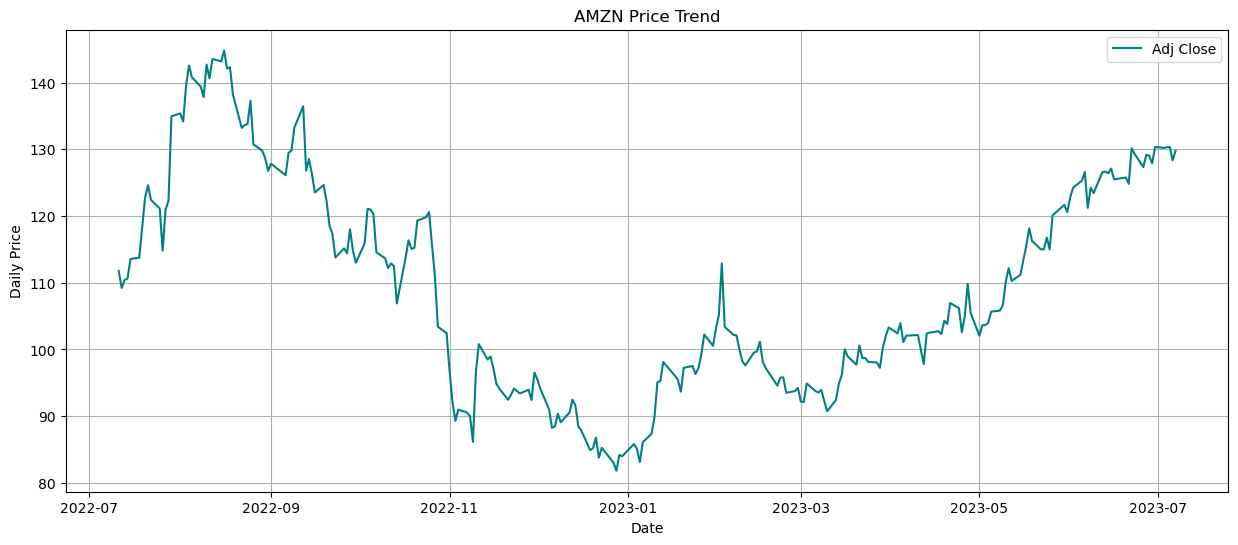

In [16]:
plt.figure(figsize=(15,6))
fig1 = plt.plot(AMZN['Adj Close'], '#008080')
plt.legend(['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Daily Price')
plt.title('AMZN Price Trend')
plt.grid()
fig1;

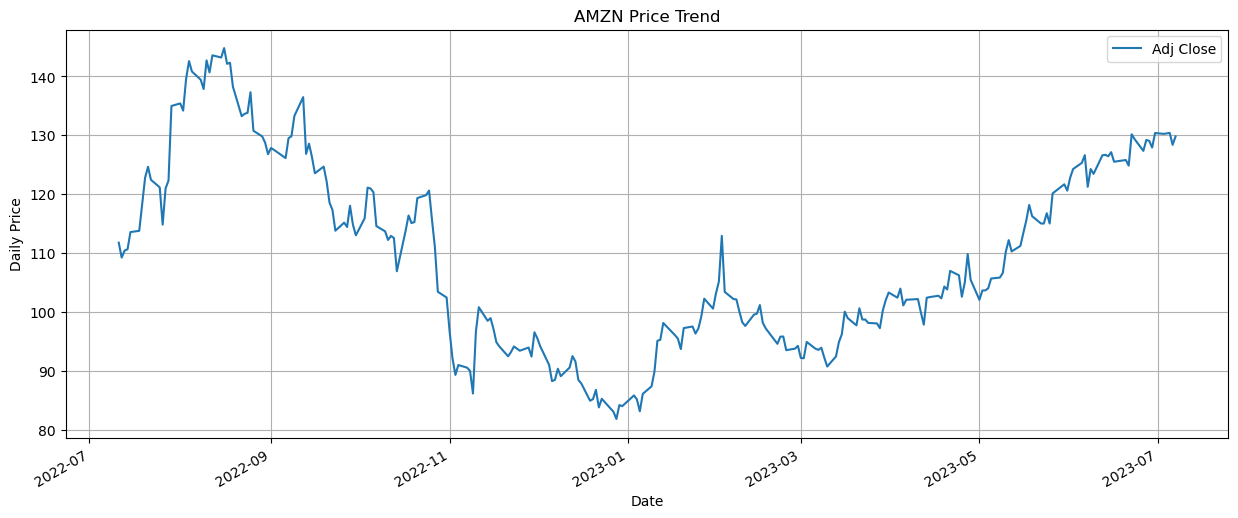

In [17]:
fig2= AMZN['Adj Close'].plot(legend=True, figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Daily Price')
plt.title('AMZN Price Trend')
plt.grid()
fig2;

In [18]:
# Moving Average

In [19]:
MA_days = [10, 20, 30]

for ma in MA_days: 
    ma_str = "MA: {}".format(ma)
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()
    AAPL[ma_str] = AAPL['Adj Close'].rolling(ma).mean()
    TLSA[ma_str] = TLSA['Adj Close'].rolling(ma).mean()
    META[ma_str] = META['Adj Close'].rolling(ma).mean()
    BLK[ma_str] = BLK['Adj Close'].rolling(ma).mean()


In [20]:
def plot_stock(stock, company_ticker):
    plt.figure(figsize = (15, 6))
    plt.plot(stock['Adj Close'])
    plt.plot(stock['MA: 10'])
    plt.plot(stock['MA: 20'])
    plt.plot(stock['MA: 30'])
    
    plt.title(company_ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA: 30'))
    plt.grid()
    plt.show()

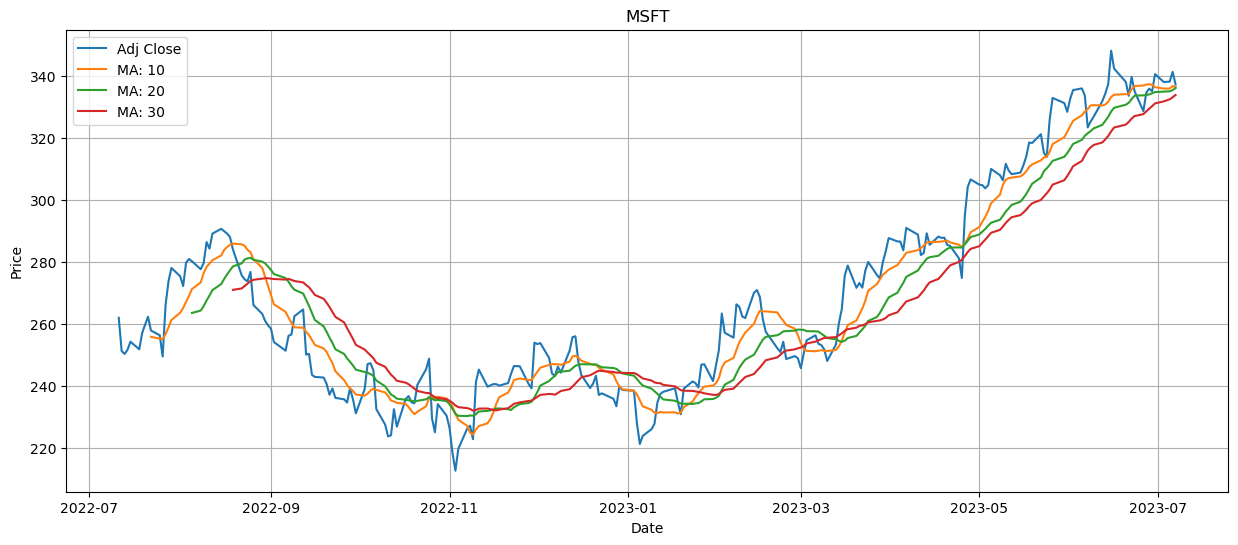

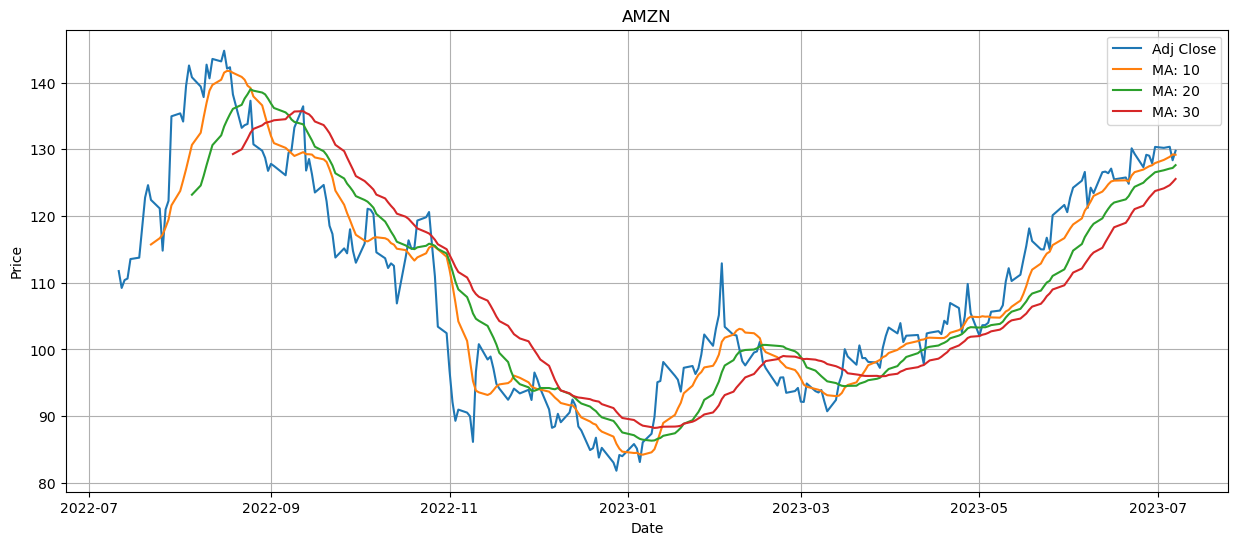

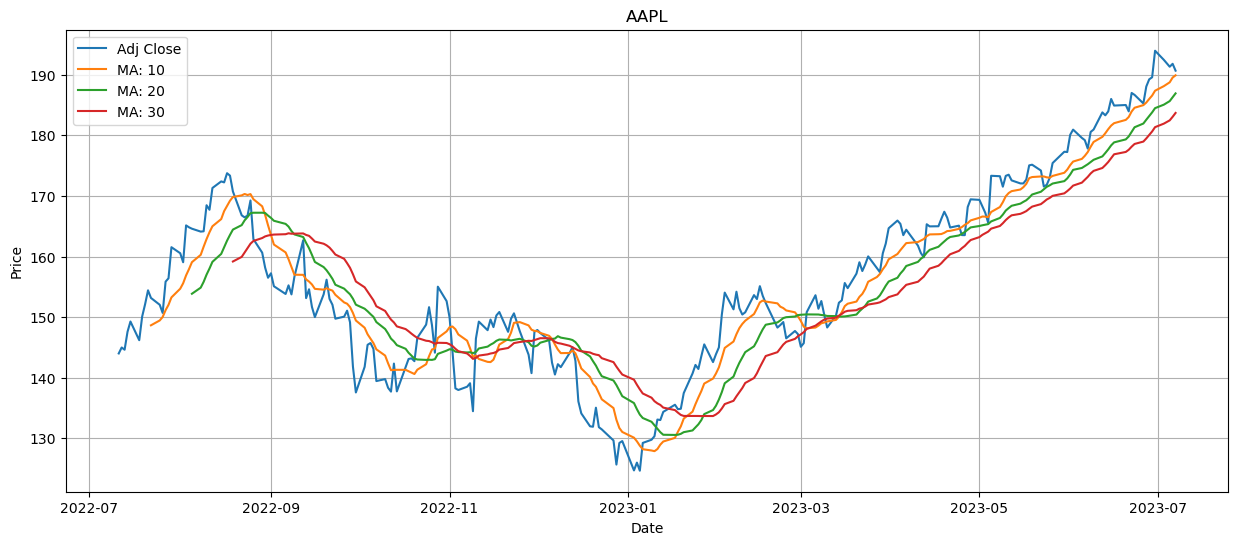

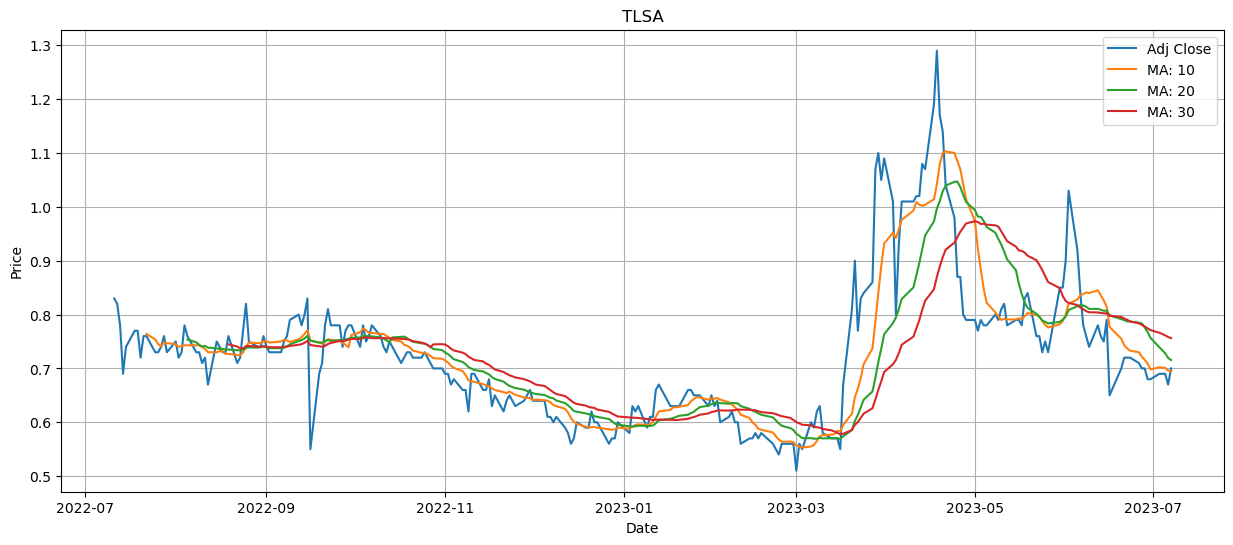

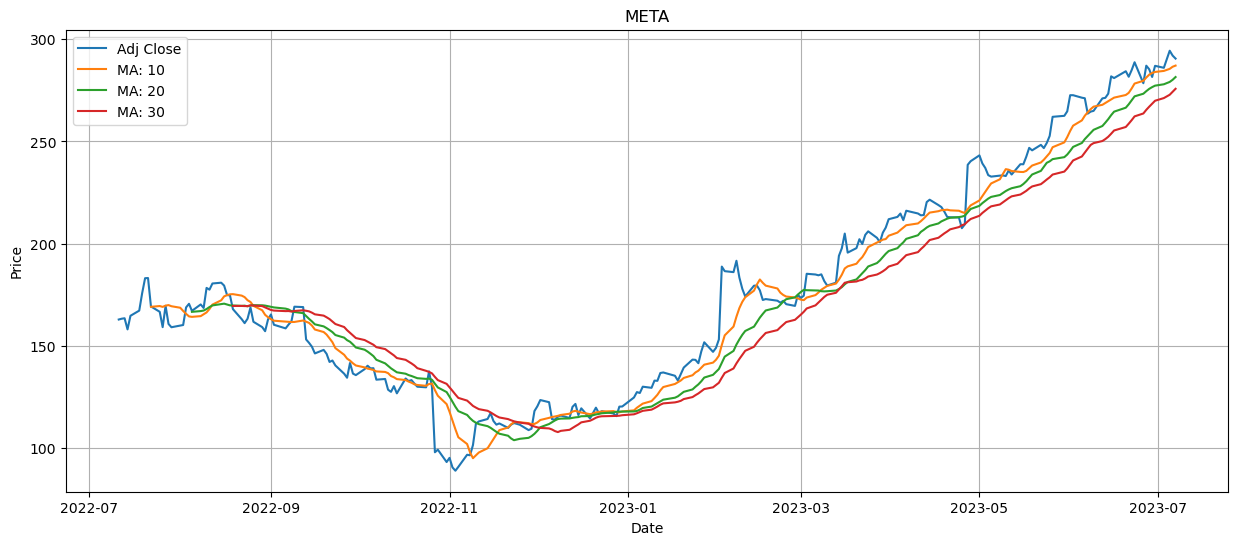

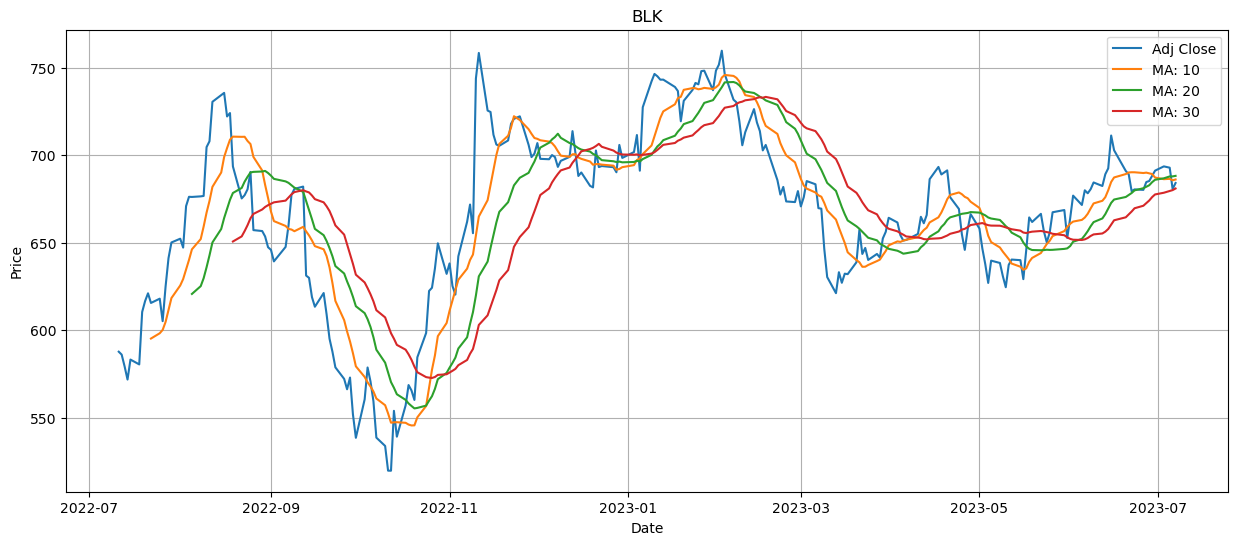

In [21]:
stock_list = [MSFT, AMZN, AAPL, TLSA, META, BLK]
company_ticker = ['MSFT', 'AMZN', 'AAPL', 'TLSA', 'META', 'BLK']

for i in range(len(stock_list)):
    plot_stock(stock_list[i], company_ticker[i])

In [22]:
# Plot Return Distributions

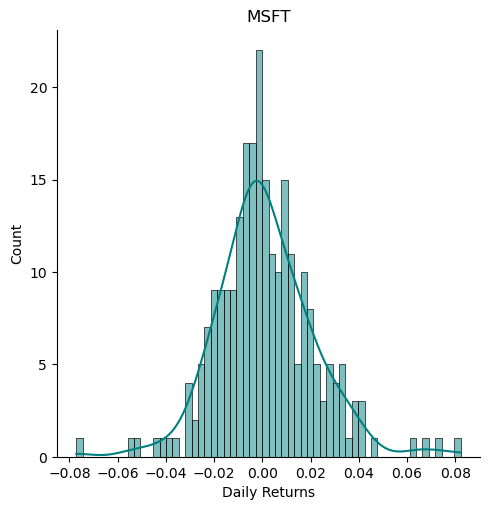

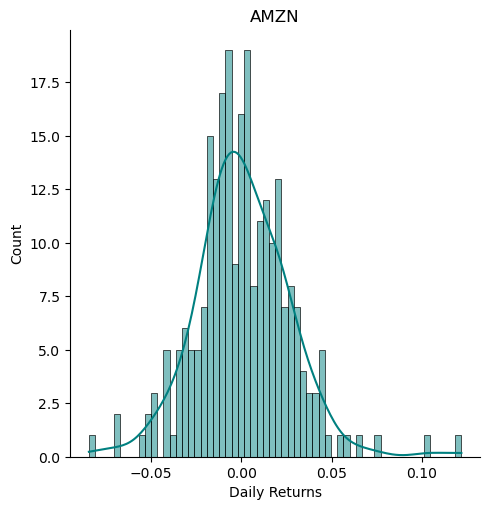

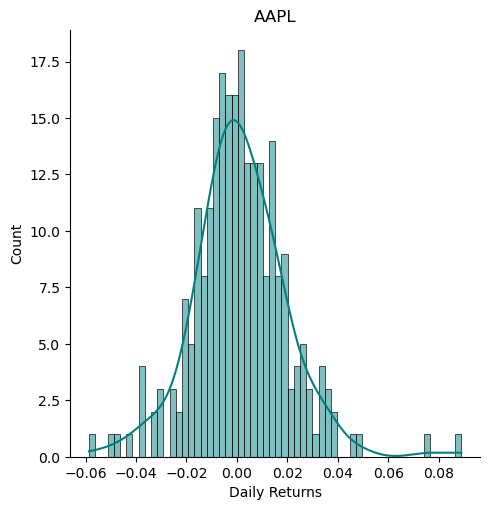

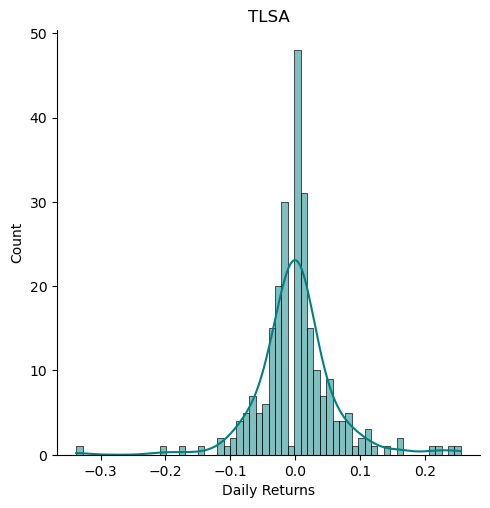

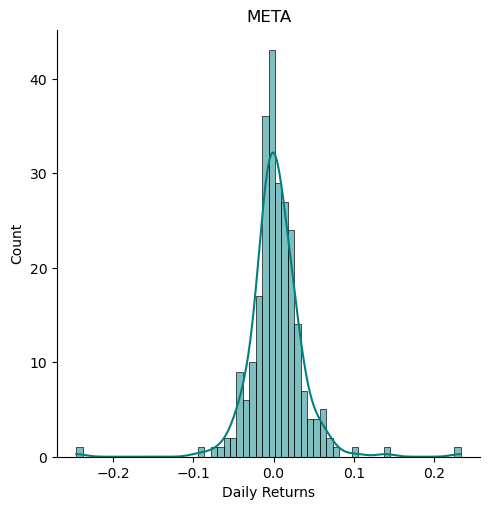

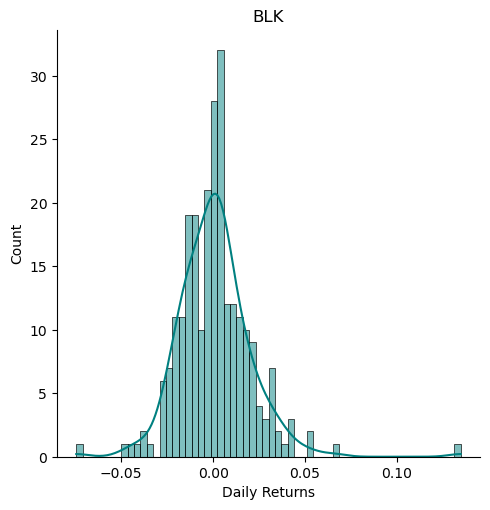

In [83]:
for i in range(len(stock_list)):
    stock_list[i]['Daily Returns'] = stock_list[i]['Adj Close'].pct_change()
    sns.displot(stock_list[i]['Daily Returns'].dropna(), bins = 60, color = '#008080', kde = True)
    plt.title(company_ticker[i])
    plt.show()

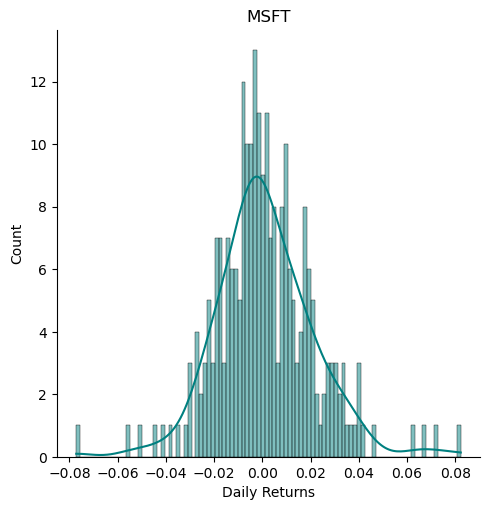

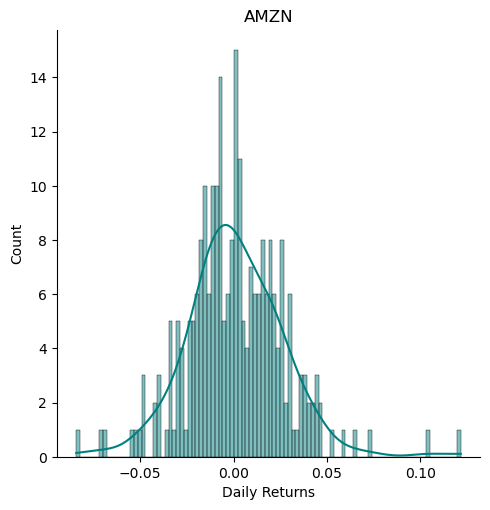

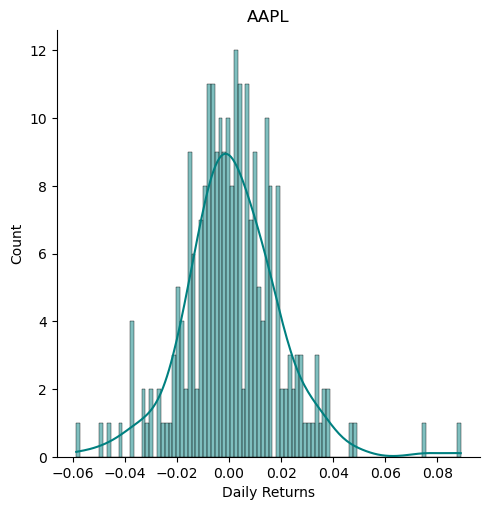

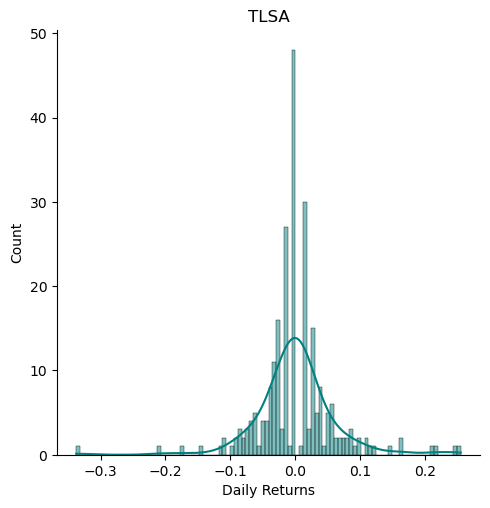

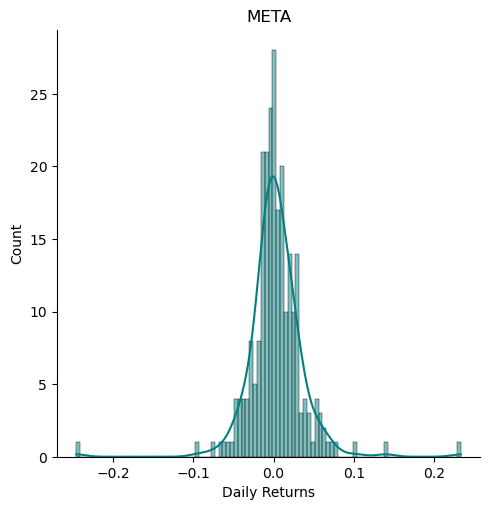

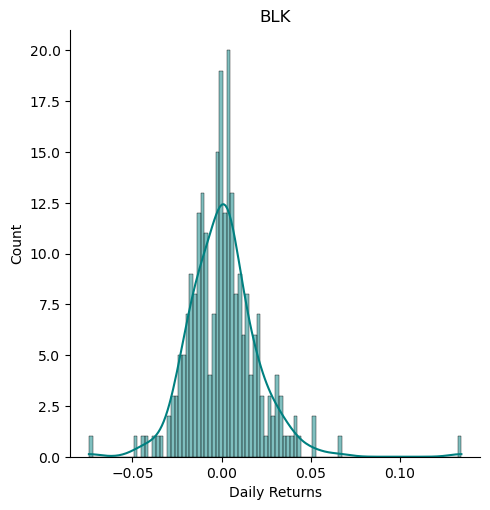

In [82]:
for i in range(len(stock_list)):
    stock_list[i]['Daily Returns'] = stock_list[i]['Adj Close'].pct_change()
    sns.displot(stock_list[i]['Daily Returns'].dropna(), bins = 100, color = '#008080', kde = True)
    plt.title(company_ticker[i])
    plt.show()

In [24]:
# Create Dataframes with Daily Stock Returns

In [25]:
stock_returns = pd.DataFrame(data = np.array([stock['Daily Returns'] for stock in stock_list]).T, columns=company_ticker)
#stock_returns.head(5).dropna()
stock_returns.dropna().head(6)

,MSFT,AMZN,AAPL,TLSA,META,BLK
1,-0.040982,-0.022640,0.006834,-0.012048,0.002394,-0.002826
2,-0.003745,0.010804,-0.002537,-0.048780,0.001347,-0.011454
3,0.005381,0.002083,0.020482,-0.115385,-0.033274,-0.012995
4,0.010390,0.026394,0.011450,0.072464,0.042075,0.019944
5,-0.009621,0.001849,-0.020643,0.040541,0.015361,-0.004730
6,0.020767,0.039117,0.026722,0.000000,0.051127,0.051562


In [26]:
# Use pairplot to visualize the correlations between returns of each stock

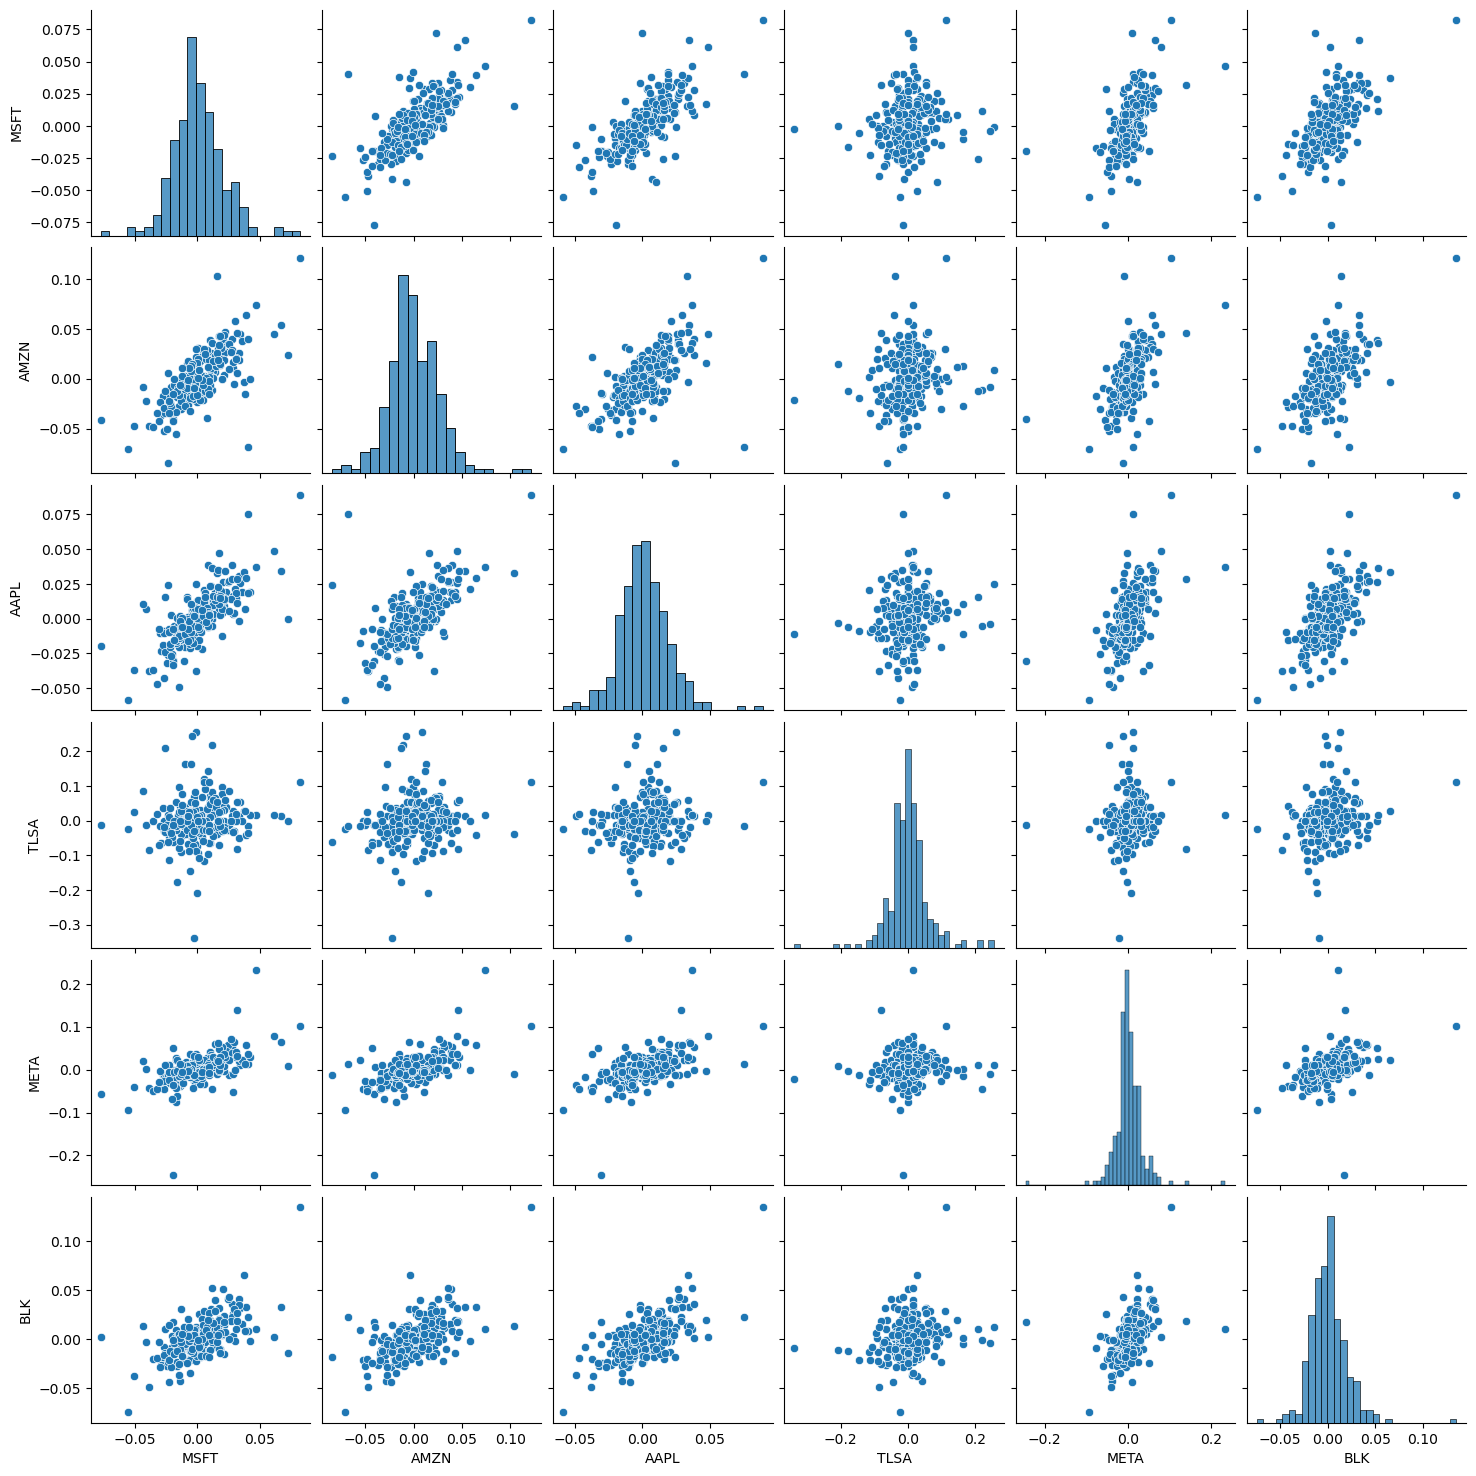

In [27]:
fig3 = sns.pairplot(stock_returns.dropna());

In [28]:
# Create Correlation Matrix

In [29]:
corr_matrix = stock_returns.corr()
corr_matrix

,MSFT,AMZN,AAPL,TLSA,META,BLK
MSFT,1.000000,0.711421,0.728159,0.120741,0.581968,0.613366
AMZN,0.711421,1.000000,0.637083,0.142379,0.576699,0.587774
AAPL,0.728159,0.637083,1.000000,0.168055,0.552318,0.665521
TLSA,0.120741,0.142379,0.168055,1.000000,0.103092,0.207952
META,0.581968,0.576699,0.552318,0.103092,1.000000,0.444686
BLK,0.613366,0.587774,0.665521,0.207952,0.444686,1.000000


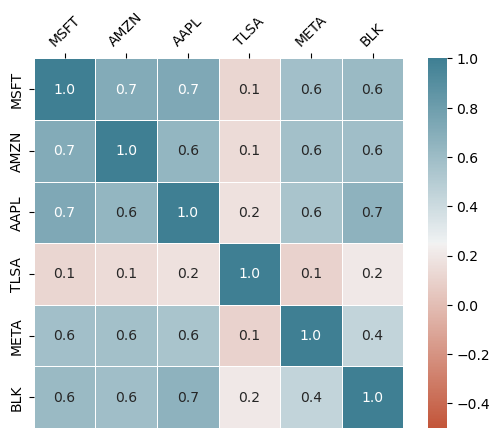

In [30]:
fig, ax = plt.subplots()
sns.heatmap(corr_matrix,
    cmap=sns.diverging_palette(20, 220, as_cmap=True),
    vmin=-0.5, vmax=1.0,
    square=True, ax=ax, annot = True, fmt=".1f", linewidth=.5)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='center');

In [31]:
# Create Joinplot to view correlation a different way

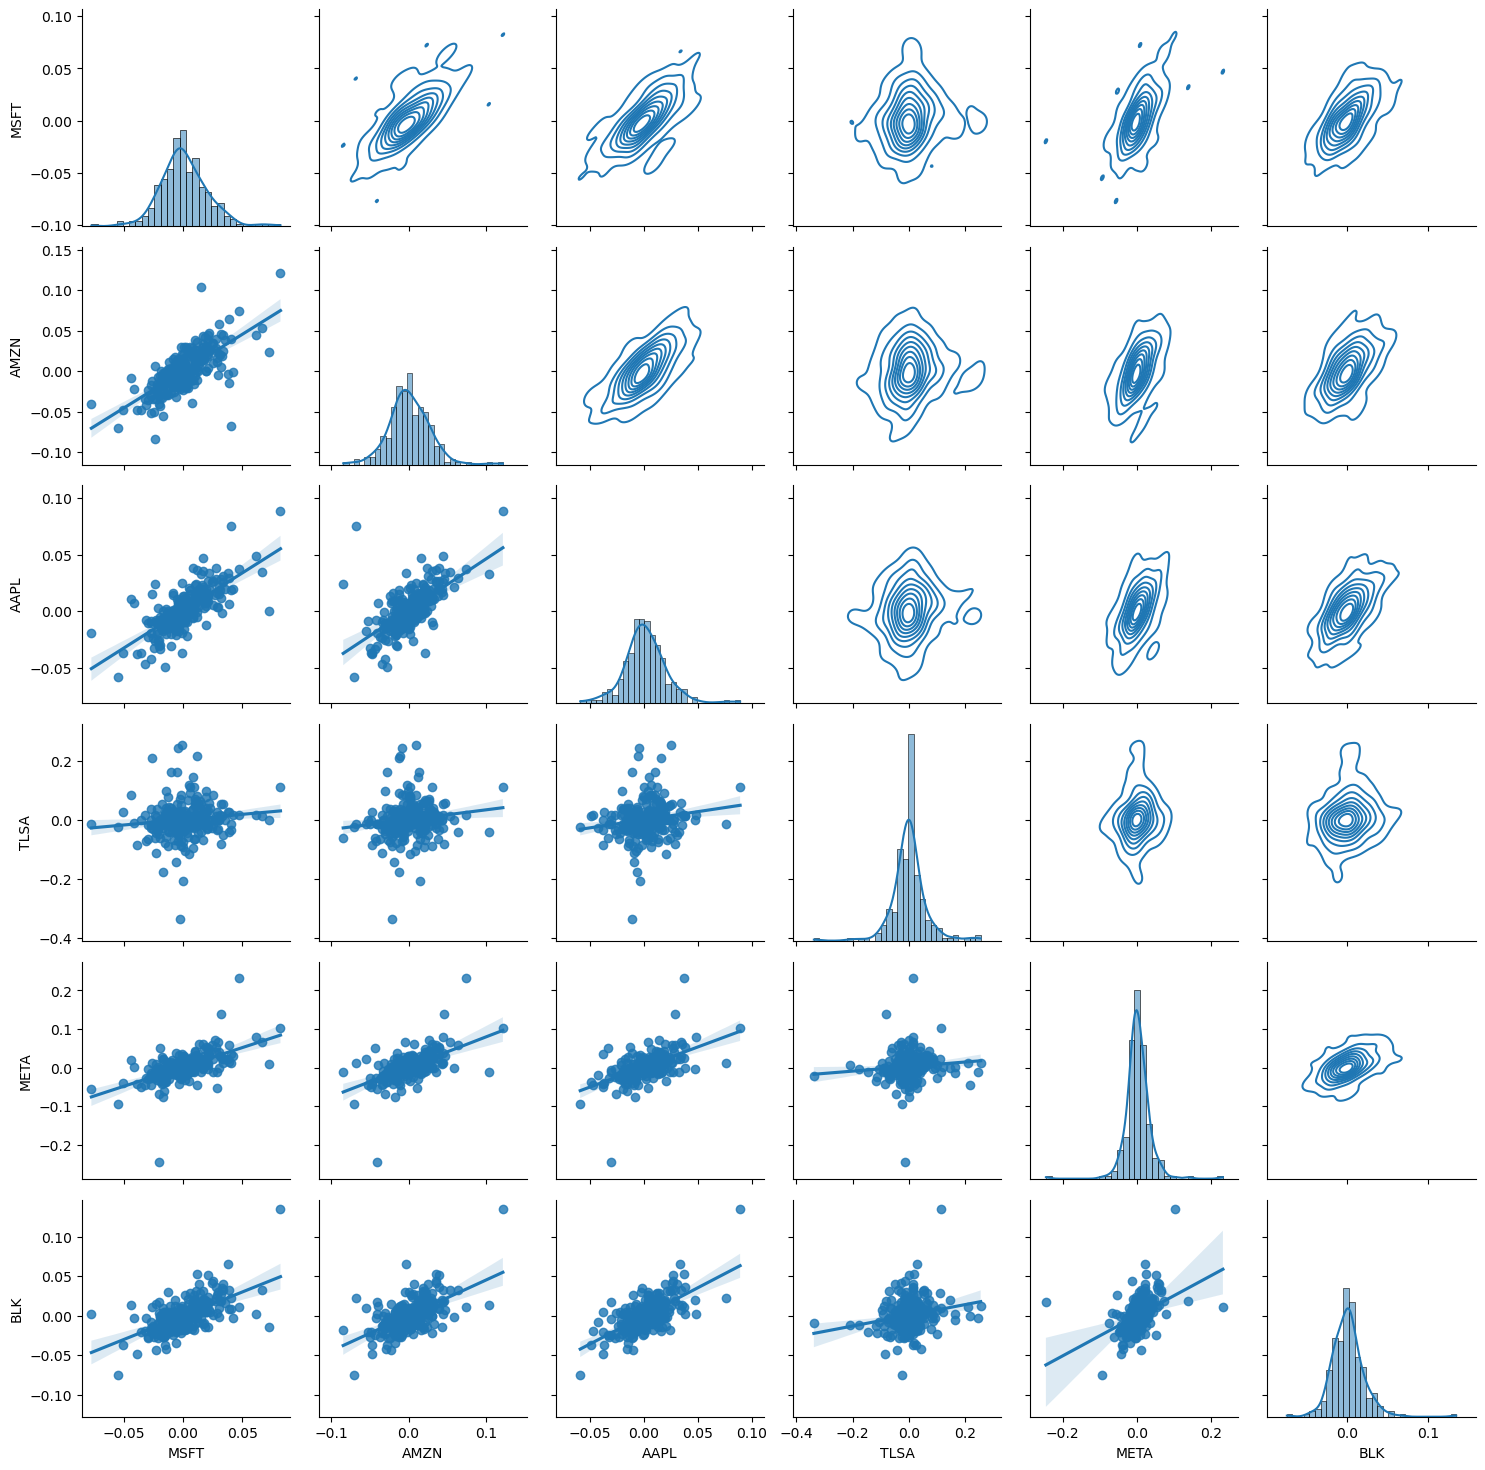

In [32]:
def create_joinplot(data):
    joinplot = sns.PairGrid(data.dropna())
    joinplot.map_lower(sns.regplot)
    joinplot.map_upper(sns.kdeplot)
    joinplot.map_diag(sns.histplot, bins=30, kde=True)
    
create_joinplot(stock_returns);

In [33]:
# Create an optimized portfolio using the 6 stocks selected

In [34]:
mean_return = stock_returns.mean() # Average return for each stock
cov_return = stock_returns.cov() # Covariance
print(mean_return, cov_return, sep = '\n')

MSFT    0.001219
AMZN    0.000937
AAPL    0.001299
TLSA    0.001204
META    0.002945
BLK     0.000805
dtype: float64
          MSFT      AMZN      AAPL      TLSA      META       BLK
MSFT  0.000414  0.000378  0.000275  0.000150  0.000415  0.000249
AMZN  0.000378  0.000681  0.000309  0.000227  0.000528  0.000306
AAPL  0.000275  0.000309  0.000345  0.000191  0.000360  0.000247
TLSA  0.000150  0.000227  0.000191  0.003737  0.000221  0.000254
META  0.000415  0.000528  0.000360  0.000221  0.001229  0.000311
BLK   0.000249  0.000306  0.000247  0.000254  0.000311  0.000399


In [35]:
portfolio_size = len(stock_returns.columns)
portfolio_size

6

In [36]:
# Create functions of Return and Risk of portfolios

In [37]:
def randomPortfolio():
    weight = np.exp(np.random.randn(portfolio_size))
    weight = weight / weight.sum()
    return weight

def RiskPortfolio(Random):
    return np.sqrt(np.matmul(np.matmul(Random, cov_return.values), Random))

def ReturnPortfolio(Random):
    return np.matmul(mean_return.values, Random)

In [38]:
# Create random portfolios of stocks with random weights

In [39]:
portfolios = 3000
risks = np.zeros(portfolios)
returns = np.zeros(portfolios)
portfolio = np.zeros((portfolios, portfolio_size))

# Function, which create new combinations of shares
for i in range(portfolios):
    random = randomPortfolio()

    portfolio[i, :] = random
    risks[i] = RiskPortfolio(random)
    returns[i] = ReturnPortfolio(random)
    

In [40]:
# The optimized portfilio has the highest sharpe ratio

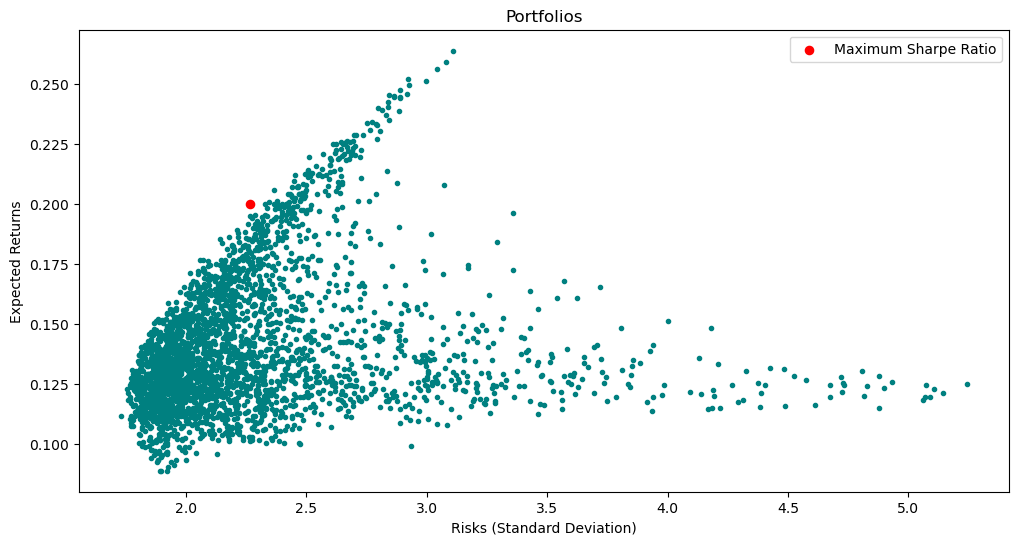

In [43]:
plt.figure(figsize=(12, 6))
MaxSharpeRatio = np.argmax(returns/risks)
plt.scatter(risks * 100, returns * 100,  c = '#008080', marker = '.')
plt.scatter(risks[MaxSharpeRatio] * 100, [returns[MaxSharpeRatio] * 100], 
            c="r", marker="o", s = 35, label="Maximum Sharpe Ratio")

plt.xlabel('Risks (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.title('Portfolios')
plt.legend()
plt.show()

In [78]:
optim_port = portfolio[MaxSharpeRatio].round(4)
for i in range(len(company_ticker)):
    print("{}: {}".format(company_ticker[i], optim_port[i]))    
optim_returns = returns[MaxSharpeRatio] * 100
optim_returns = (optim_returns * 100).round(2).astype(str) + '%'
print('')
print('Assuming no investment contraints and only investing into' + '\n' +
      'these six stocks, the maximum portfolio return is expected to be: '
      + str(optim_returns) + ' using sharpe ratios comparison.')

MSFT: 0.0161
AMZN: 0.0138
AAPL: 0.4879
TLSA: 0.0464
META: 0.4324
BLK: 0.0034

Assuming no investment contraints and only investing into
these six stocks, the maximum portfolio return is expected to be: 19.99% using sharpe ratios comparison.
